In [1]:
import matplotlib
import matplotlib.pyplot as plt
import json
from collections import defaultdict

In [2]:
# author information

paper_author = defaultdict(list)
author_paper = defaultdict(list)

with open('D:/Aminer/json/aminer_author2paper.json',  encoding="utf8") as json_file:  
    data = json.load(json_file)
    for p in data['RECORDS']:
        paper_author[p['pid']].append(p['aid'])
        author_paper[p['aid']].append(p['pid'])

In [3]:
# paper metadata

paper_title = {}
paper_year = {}
paper_venue = {}
with open('D:/Aminer/json/aminer_paper.json',  encoding="utf8") as json_file:  
    data = json.load(json_file, strict = False)
    for p in data['RECORDS']:
        paper_title[p['pid']] = p['p_title']
        paper_year[p['pid']] = int(p['p_year'])
        paper_venue[p['pid']] = p['p_venue']

In [4]:
# direct citations

paper_citing = defaultdict(list)
with open('D:/Aminer/json/aminer_reference.json',  encoding="utf8") as json_file:  
    data = json.load(json_file)
    for p in data['RECORDS']:
        paper_citing[p['pid']].append(p['cpid'])

In [5]:
def self_citation_whether (paper_1, paper_2):
    for author_1 in paper_author[paper_1]:
        for author_2 in paper_author[paper_2]:
            if author_1 == author_2:
                return True
    return False

In [6]:
# indirect citations
indirect_citation = defaultdict(list)
for paper in paper_year.keys():
    for citing_paper_1 in paper_citing[paper]:
        for citing_paper_2 in paper_citing[paper]:
            if citing_paper_1 in paper_citing[citing_paper_2]:
                temp = []
                temp.append(citing_paper_1)
                temp.append(citing_paper_2)
                indirect_citation[paper].append(temp)

# Considering authors' previous collaboration history

In [7]:
def collaboration_before(author_1, author_2, year_check):
    for paper_1 in author_paper[author_1]:
        for paper_2 in author_paper[author_2]:
            if paper_1 == paper_2 and paper_year[paper_1] <= year_check:
                return True
    return False
    

def self_citation_previous_whether(paper_1, paper_2, soft_year = 0):
    #if we want to examine whether they collaborate before 2007, if solf_year=1, we will check 2008 and before. By default it is 0.
    year_check = max(paper_1, paper_2) + soft_year
    for author_1 in paper_author[paper_1]:
        for author_2 in paper_author[paper_2]:
            if collaboration_before(author_1, author_2, year_check):
                return True
    return False

0 out of 10000 citations have been processed...
100 out of 10000 citations have been processed...
200 out of 10000 citations have been processed...
300 out of 10000 citations have been processed...
400 out of 10000 citations have been processed...
500 out of 10000 citations have been processed...
600 out of 10000 citations have been processed...
700 out of 10000 citations have been processed...
800 out of 10000 citations have been processed...
900 out of 10000 citations have been processed...
1000 out of 10000 citations have been processed...


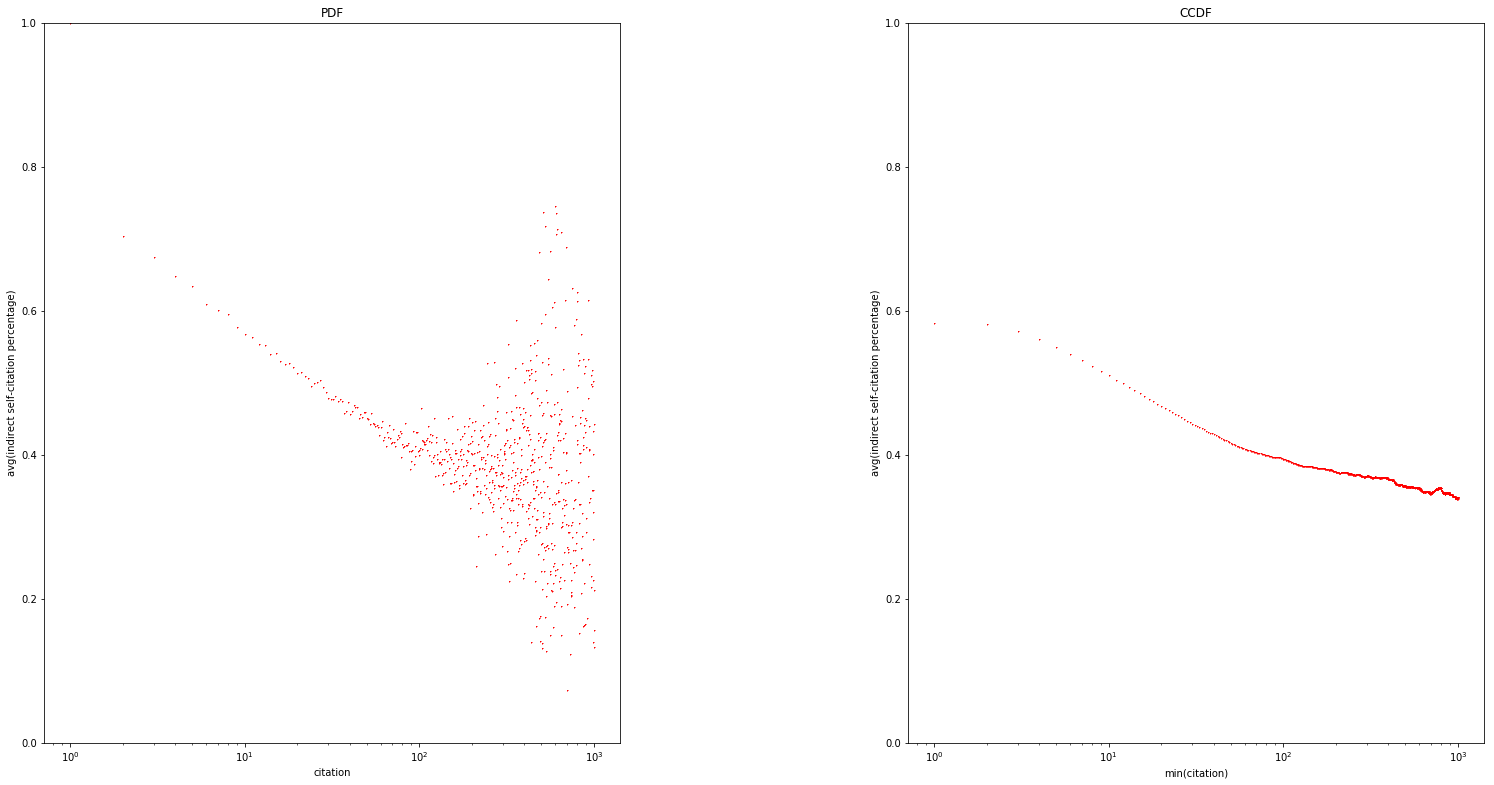

In [9]:
# Indirect citation

indirect_self_list = []
cc_list_0 = []

for paper in paper_year.keys():
    indirect_self = 0
    for temp in indirect_citation[paper]:
        if self_citation_previous_whether(temp[0], temp[1]):
            indirect_self += 1
    if len(indirect_citation[paper]) > 0:
        indirect_self = float(indirect_self) / float(len(indirect_citation[paper]))
        indirect_self_list.append(indirect_self)
        cc_list_0.append(len(paper_citing[paper]))

x5_list = []
y5_list = []
x6_list = []
y6_list = []
for cc in range(0, 10001):
    if cc % 1000 == 0:
        print (str(cc) + " out of 10000 citations have been processed...")
    temp_5 = 0
    count_5 = 0
    panduan_5 = 0
    temp_6 = 0
    count_6 = 0
    panduan_6 = 0
    for i in range(len(cc_list_0)):
        if cc_list_0[i] == cc:
            temp_5 += indirect_self_list[i]
            count_5 += 1
            panduan_5 = 1
        if cc_list_0[i] >= cc:
            temp_6 += indirect_self_list[i]
            count_6 += 1
            panduan_6 = 1
    if panduan_5 == 1:
        x5_list.append(cc)
        y5_list.append(float(temp_5) / float(count_5))
    if panduan_6 == 1:
        x6_list.append(cc)
        y6_list.append(float(temp_6) / float(count_6))

plt.figure(figsize=(10,5))
matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.subplot(1,2,1)
plt.plot(x5_list, y5_list, "r+", markersize = 1)
plt.title('PDF')
plt.xlabel("citation")
plt.ylabel("avg(indirect self-citation percentage)")
plt.ylim([0,1])
plt.xscale("log")

plt.subplot(1,2,2)
plt.plot(x6_list, y6_list, "r+", markersize = 1)
plt.title('CCDF')
plt.xlabel("min(citation)")
plt.ylabel("avg(indirect self-citation percentage)")
plt.ylim([0,1])
plt.xscale("log")

plt.subplots_adjust (left = 2, right = 4, top = 4, bottom = 2, wspace = 0.5, hspace = 0.5)
plt.show()

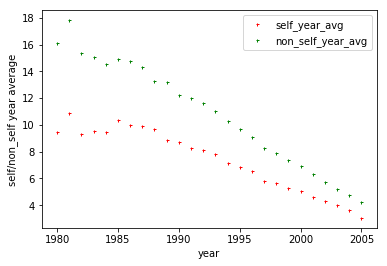

In [10]:
# Self-citations and year

year_list = [] #from 1980 to 2005
self_year_list = []
non_self_year_list = []
count = 0


for year in range(1980, 2006):
    self_year = 0
    non_self_year = 0
    self_count = 0
    non_self_count = 0
    for paper in paper_year.keys():
        count += 1
        if paper_year[paper] == year:
            if paper in paper_citing.keys():

                for citing_paper in paper_citing[paper]:
                    if self_citation_previous_whether(paper, citing_paper):
                        self_year += (paper_year[citing_paper] - paper_year[paper])
                        self_count += 1
                    else:
                        non_self_year += (paper_year[citing_paper] - paper_year[paper])
                        non_self_count += 1
    self_year_list.append(float(self_year) / float(self_count + 1))
    non_self_year_list.append(float(non_self_year) / float(non_self_count + 1))
    year_list.append(year)

plt.plot(year_list, self_year_list, "r+", markersize = 3, label = 'self_year_avg')
plt.plot(year_list, non_self_year_list, "g+", markersize = 3, label = 'non_self_year_avg')
plt.xlabel('year')
plt.ylabel('self/non_self year average')
plt.legend(loc = 'upper right')
plt.show()   

# Considering authors' "social distance" (coauthors' coauthors, etc.)

In [14]:
def social_distance (author_1, author_2, year_check):
    if collaboration_before(author_1, author_2, year_check):
        return 0
    else:
        for author in author_paper.keys():
            if collaboration_before(author_1, author, year_check) and collaboration_before(author_2, author, year_check):
                return 1
        for author_a in author_paper.keys():
            for author_b in author_paper.keys():
                if collaboration_before(author_1, author_a, year_check) and collaboration_before(author_2, author_b, year_check) and collaboration_before(author_a, author_b, year_check):
                    return 2
        return 3
# 0: co-author relationship before this year (A-B)
# 1: they share another co-author before this year (A-X-B)
# 2: their co-authors have ever collaborated at least once before this year (A-X1-X2-B)
# 3: "farther" relationship

In [ ]:
# Case study: Papers in 2000

type_0_edge = []
type_1_edge = []
type_2_edge = []
type_3_edge = []
cc_list_5 = []

for paper in paper_year.keys():
    if paper_year[paper] == 2000:
        type_0 = 0
        type_1 = 0
        type_2 = 0
        type_3 = 0
        for citing_paper in paper_citing[paper]:
            # for each citing paper
            for author_owner in paper_author[paper]:
                for author_endorser in paper_author[citing_paper]:
                    temp = social_distance (author_owner, author_endorser, paper_year[citing_paper])
                    if temp == 0:
                        type_0 += 1
                    elif temp == 1:
                        type_1 += 1
                    elif tmpe == 2:
                        type_2 += 1
                    else:
                        type_3 += 1
        type_0_edge.append(type_0)
        type_1_edge.append(type_1)
        type_2_edge.append(type_2)
        type_3_edge.append(type_3)
        cc_list_5.append(len(paper_citing[paper]))


In [ ]:
plt.plot(cc_list_5, type_0_edge, "r+", markersize = 3, label = "social distance = 0")
plt.plot(cc_list_5, type_1_edge, "g+", markersize = 3, label = "social distance = 1")
plt.plot(cc_list_5, type_2_edge, "b+", markersize = 3, label = "social distance = 2")
plt.plot(cc_list_5, type_3_edge, "y+", markersize = 3, label = "social distance = 3")
plt.xlabel('cc')
plt.ylabel('number of different types of citations')
plt.legend(loc = 'upper left')
plt.show()